In [1]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
import spacy


base_path = "/media/ruben/Data Drive/react-data/protest/selection2"

d_ = dict()
for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) if "npg" in photo]:
    photo_folder = os.path.join(base_path, photo)
    num_iterations = len([fol for fol in os.listdir(photo_folder) if os.path.isdir(os.path.join(photo_folder,fol)) and "source" not in fol])
    start_iter = 1
    range_iter = [str(i) for i in list(range(1,num_iterations+1))]
    folder_base = os.path.join(base_path,photo,photo)
    
    list_html = []
    for it in range_iter:
        html_folder = folder_base+"_"+it+"/html"
        list_html += [os.path.join(html_folder,f) for f in os.listdir(html_folder) if ".html" in f]
    d_.update({photo:len(list_html)})

FileNotFoundError: [Errno 2] No such file or directory: '/media/ruben/Data Drive/react-data/protest/selection2/1/1_3/html'

In [10]:
df = pd.DataFrame(list(d_.items()),columns=['photo',"pages"])
df = df.groupby('photo')['pages'].sum().sort_values()
df.to_csv("sum-photos-selection.csv")

In [21]:
## After manually finding correct cities
df = pd.read_csv("sum-photos-selection.csv")
p = df.plot(kind="barh", x="photo",y="pages",figsize=(10,6))
df = df.groupby('country')['pages'].sum().sort_values()
df.plot(kind="barh",figsize=(10,6))

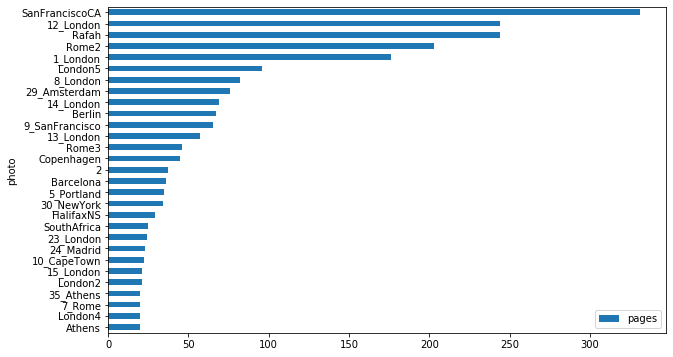

In [8]:
dfp = pd.read_csv('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/frequency-per-photo.csv')
dfp['year'] = dfp['year'].astype(str)

In [15]:
dfp = dfp[dfp['year'] != "2020"]

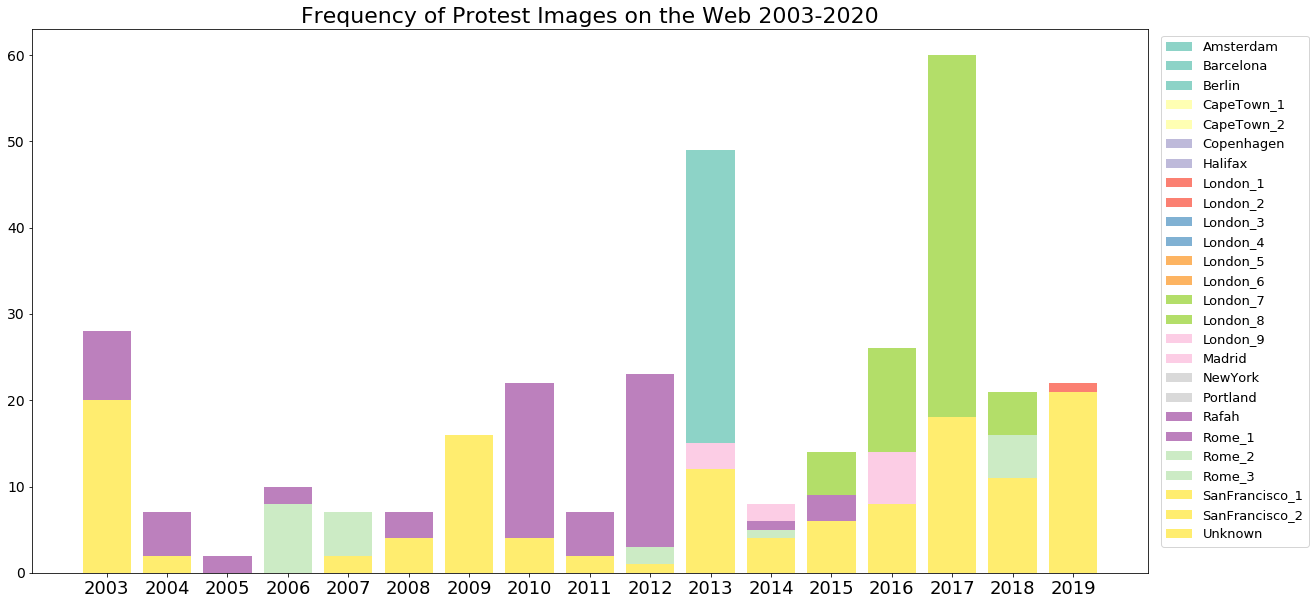

In [22]:
from pylab import *

cmap = cm.get_cmap('Set3', len(list(dfp.columns)[1:]))    # PiYG
colors = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    colors.append(matplotlib.colors.rgb2hex(rgb))
hfont = {'fontname':'Helvetica'}

plt.figure(figsize=(20, 10))

for c,city in enumerate(list(dfp.columns)[1:]):
    plt.bar(list(dfp['year']), list(dfp[city]), color=colors[c])

plt.legend(list(dfp.columns)[1:],fontsize=13,bbox_to_anchor=(1.15, 1))
plt.title('Frequency of Protest Images on the Web 2003-2020',fontsize=22)
plt.yticks(fontsize=14)
plt.xticks(fontsize=18)
plt.savefig("frequency-photo-diachronic.png", format = 'png', dpi = 600, bbox_inches = "tight")
plt.show()